## example_freeflame

Illustrating a one-dimensional cantera simulation using the `ctwrap` package using the `freeflame` module.

In [1]:
import cantera as ct

import ctwrap as cw
import ctwrap.modules as cw_plugins

In [2]:
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


In [3]:
plg = cw_plugins.freeflame
plg

<function ctwrap.modules.freeflame.freeflame(name, verbosity=0, chemistry=None, upstream=None, domain=None, loglevel=0)>

In [4]:
s = cw.SimulationHandler.from_yaml('freeflame.yaml', verbosity=1)
s

Simulation tasks: [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]


In [5]:
s.configuration()

{'chemistry': {'mechanism': 'h2o2.xml', 'path': ''},
 'domain': {'width': [30, 'millimeter', 'domain width']},
 'upstream': {'P': [1.0, 'atmosphere', 'pressure'],
  'T': [300.0, 'kelvin', 'temperature'],
  'fuel': 'H2',
  'oxidizer': 'O2:1,AR:5',
  'phi': [0.55, 'dimensionless', 'equivalence ratio']}}

### Run in serial/parallel

In [6]:
%%time
s.run_serial(plugin=plg, verbosity=1, loglevel=0)

 * processing `upstream.phi`: 0.4
    phi=0.4: mixture-averaged flamespeed = 0.201058 m/s
    phi=0.4: multi-component flamespeed  = 0.215256 m/s
 * processing `upstream.phi`: 0.6
    phi=0.6: mixture-averaged flamespeed = 0.924047 m/s
    phi=0.6: multi-component flamespeed  = 0.934704 m/s
 * processing `upstream.phi`: 0.8
    phi=0.8: mixture-averaged flamespeed = 1.735133 m/s
    phi=0.8: multi-component flamespeed  = 1.720514 m/s
 * processing `upstream.phi`: 1.0
    phi=1.0: mixture-averaged flamespeed = 2.322010 m/s
    phi=1.0: multi-component flamespeed  = 2.289856 m/s
 * processing `upstream.phi`: 1.2
    phi=1.2: mixture-averaged flamespeed = 2.716045 m/s
    phi=1.2: multi-component flamespeed  = 2.671883 m/s
 * processing `upstream.phi`: 1.4
    phi=1.4: mixture-averaged flamespeed = 2.951101 m/s
    phi=1.4: multi-component flamespeed  = 2.899580 m/s
 * processing `upstream.phi`: 1.6
    phi=1.6: mixture-averaged flamespeed = 3.051486 m/s
    phi=1.6: multi-component flame

True

In [7]:
%%time
s.run_parallel(plugin=plg, verbosity=0)

    phi=0.6: mixture-averaged flamespeed = 0.924047 m/s
    phi=0.8: mixture-averaged flamespeed = 1.735133 m/s
    phi=0.6: multi-component flamespeed  = 0.934704 m/s
    phi=0.8: multi-component flamespeed  = 1.720514 m/s
    phi=0.4: mixture-averaged flamespeed = 0.201058 m/s
    phi=1.0: mixture-averaged flamespeed = 2.322010 m/s
    phi=0.4: multi-component flamespeed  = 0.215256 m/s
    phi=1.0: multi-component flamespeed  = 2.289856 m/s
    phi=1.2: mixture-averaged flamespeed = 2.716045 m/s
    phi=1.2: multi-component flamespeed  = 2.671883 m/s
    phi=1.4: mixture-averaged flamespeed = 2.951101 m/s
    phi=1.4: multi-component flamespeed  = 2.899580 m/s
    phi=1.8: mixture-averaged flamespeed = 3.045410 m/s
    phi=1.8: multi-component flamespeed  = 2.992115 m/s
    phi=1.6: mixture-averaged flamespeed = 3.051486 m/s
    phi=1.6: multi-component flamespeed  = 2.997080 m/s
    phi=2.0: mixture-averaged flamespeed = 2.973896 m/s
    phi=2.0: multi-component flamespeed  = 2.924

True

In [8]:
#s.run_parallel(plugin=plg, verbosity=1)

### 3. Create Graphical Output

In [9]:
# load data from output file
data = cw.fileio.from_hdf(s.oname)
data.keys()

dict_keys(['phi=2.2:mix', 'phi=2.4:mix', 'configuration', 'phi=2.2:multi', 'phi=1.4:mix', 'phi=2.4:multi', 'phi=1.4:multi', 'phi=0.4:multi', 'phi=1.0:multi', 'phi=0.8:multi', 'phi=0.6:multi', 'phi=1.2:multi', 'phi=2.0:multi', 'variation', 'phi=2.6:mix', 'phi=2.0:mix', 'phi=0.4:mix', 'phi=2.6:multi', 'phi=1.8:multi', 'phi=0.8:mix', 'phi=1.6:multi', 'phi=1.0:mix', 'phi=0.6:mix', 'phi=1.2:mix', 'phi=1.8:mix', 'phi=1.6:mix'])

In [10]:
mix = {k.split(':')[0]: data[k] for k in data if 'mix' in k}
mlt = {k.split(':')[0]: data[k] for k in data if 'multi' in k}

phi = data.get('variation')['tasks']
phi

[0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

col = mpl.rcParams['axes.prop_cycle'].by_key()['color']
n_col = len(col)

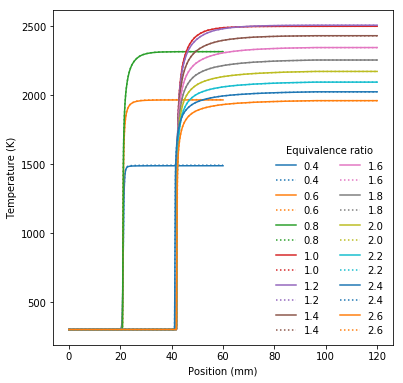

In [12]:
# create figure and adjust size/spacing
fig, ax = plt.subplots(1) #
fig.set_size_inches(6.,6.,forward=True)
fig.subplots_adjust(hspace=0,bottom=.125,top=.9,left=.17,right=.955)

# plot results
for i, v in enumerate(phi):
    key = 'phi={}'.format(v)
    df = mix[key]
    ax.plot(1000*df['z (m)'], df['T (K)'], color=col[i % n_col], 
            linestyle='-', label=key[4:]) 
    df = mlt[key]
    ax.plot(1000*df['z (m)'], df['T (K)'], color=col[i % n_col], 
            linestyle=':', label=key[4:]) 

# add title/axis labels
ax.set_xlabel('Position (mm)')
ax.set_ylabel('Temperature (K)')

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Equivalence ratio', ncol=2) # % mech)
_ = leg.draw_frame(False) 

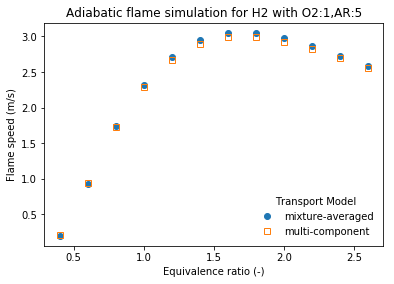

In [13]:
# create figure and adjust size/spacing
fig, ax = plt.subplots(1) #
fig.set_size_inches(6.,4.,forward=True)
fig.subplots_adjust(hspace=0,bottom=.125,top=.9,left=.17,right=.955)

# plot results
u_mix = [ mix['phi={}'.format(v)]['u (m/s)'][0] for v in phi]
u_mlt = [ mlt['phi={}'.format(v)]['u (m/s)'][0] for v in phi]

ax.plot(phi, u_mix, marker='o', 
            linestyle='none', label='mixture-averaged') 
ax.plot(phi, u_mlt, marker='s', 
            markerfacecolor='none',
            linestyle='none', label='multi-component') 

# add title/axis labels
ax.set_xlabel('Equivalence ratio (-)')
ax.set_ylabel('Flame speed (m/s)')

up = data.get('configuration')['upstream']
ax.set_title('Adiabatic flame simulation for {} with {}'.format(up['fuel'],up['oxidizer']))

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Transport Model') # % mech)
_ = leg.draw_frame(False) 